<a href="https://colab.research.google.com/github/pzwiernik/22997-networks/blob/main/colabs/Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and imports

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip, requests
import numpy as np

## ✈️ Flight Network Dataset  

In this exercise, we will use the **OpenFlights USA network** dataset.  

- **Nodes** represent airports in the United States.  
- **Edges** represent direct commercial flight routes between airports.  
- The data comes from the [OpenFlights project](https://openflights.org/), an open database of airports and airline routes worldwide.  
- For this tutorial, we work with the **US subset** of the global network.  

Why is this dataset interesting?  
- It allows us to identify **major hubs** (highly connected airports).  
- We can analyze how air travel connects different regions of the country.  
- It is also a useful example of how network structure affects efficiency, delays, and even the **spread of diseases** through travel.  

In [25]:
url = "https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/openflights/openflights_usa.graphml.gz"

r = requests.get(url)
with open("openflights_usa.graphml.gz", "wb") as f:
    f.write(r.content)

with gzip.open("openflights_usa.graphml.gz", "rb") as f:
    G = nx.read_graphml(f)

We start with very basic statistics. We check the size of the network: number of airports, routes, and average degree.



In [26]:
# Make undirected for degree analysis
if G.is_directed():
    G = G.to_undirected()

N = G.number_of_nodes()
L = G.number_of_edges()

print(f"Number of nodes: {N}")
print(f"Number of edges: {L}")
print(f"Average degree: {2*L/N:.2f}")

Number of nodes: 546
Number of edges: 2781
Average degree: 10.19


## Degree distribution

The degree of an airport = number of direct connections it has.
We plot the degree distribution to see how connectivity varies across airports.


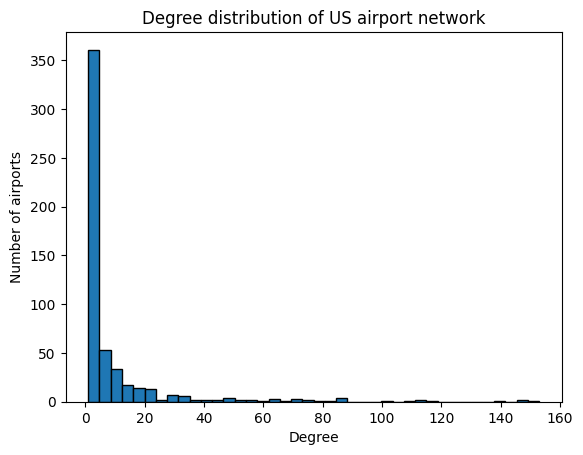

In [27]:
degrees = [d for _, d in G.degree()]

plt.hist(degrees, bins=40, edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Number of airports")
plt.title("Degree distribution of US airport network")
plt.show()

## Visualize the network

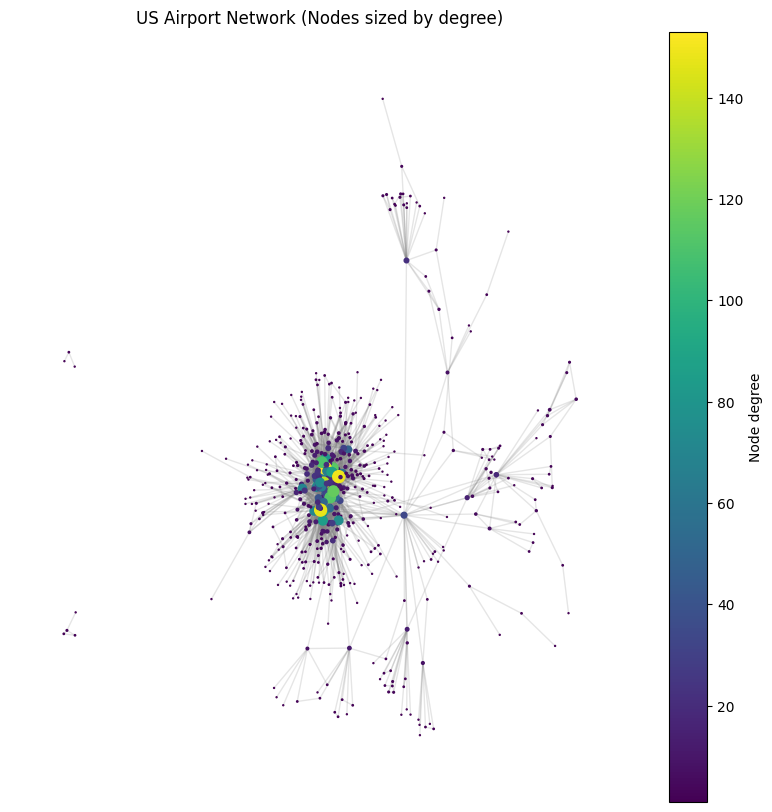

In [28]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)

# Node degree
degrees = dict(G.degree())
node_sizes = [degrees[n]*0.5 for n in G.nodes()]  # scale node size
node_colors = [degrees[n] for n in G.nodes()]

# Draw graph
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis
)
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color="gray")

# Title and colorbar
plt.title("US Airport Network (Nodes sized by degree)")
plt.axis("off")
plt.colorbar(nodes, ax=plt.gca(), label="Node degree")
plt.show()

## The log-log plot

Consider now the plot of the log-degree against its log-distribution. Note that the plot looks approximately linear.

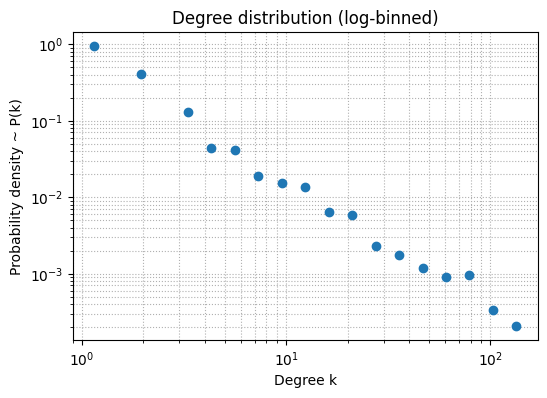

In [23]:
# Degree sequence
deg = np.array([d for _, d in G.degree() if d > 0])  # drop zeros to avoid log issues

# Log-spaced bins
bins = np.logspace(np.log10(deg.min()), np.log10(deg.max()), num=20)
hist, bin_edges = np.histogram(deg, bins=bins, density=True)

# Bin centers
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

plt.figure(figsize=(6,4))
plt.loglog(bin_centers, hist, marker='o', linestyle='none')
plt.xlabel('Degree k')
plt.ylabel('Probability density ~ P(k)')
plt.title('Degree distribution (log-binned)')
plt.grid(True, which='both', ls=':')
plt.show()